# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Ensemble Averages

Ensemble averages characterize the average properties of a sample function across the population of all possible sample functions of the ensemble. We distinguish between first and higher-order ensemble averages. The former considers the properties of the sample functions for one particular time instant $k$, while the latter take different signals at different time instants into account.

### First Order Ensemble Averages

#### Definition

The first order ensemble average of a continuous-amplitude real-valued random signal $x[k]$ is defined as

$$ E\{ f(x[k]) \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k]) $$

where $E\{ \cdot \}$ denotes the expectation operator, $x_n[k]$ the $n$-th sample function and $f(\cdot)$ an arbitrary mapping function. It is evident from the definition that the ensemble average can only be given exactly for random processes where the internal structure is known. For practical random processes, like e.g. speech, the ensemble average can only be approximated by a finite but sufficient large number $N$ of sample functions.

The ensemble average can also be given in terms of the univariate probability density function (PDF)

$$ E\{ f(x[k]) \} = \int\limits_{-\infty}^{\infty} f(\theta) \, p_x(\theta, k) \, \mathrm{d}\theta $$

#### Properties

1. The ensemble averages for two different time instants $k_1$ and $k_2$ differ in general

    $$E\{ f(x[k_1]) \} \neq E\{ f(x[k_2]) \}$$
    
2. For a linear mapping $f(x[k]) = x[k]$, the ensemble average is a linear operation
    
    $$E\{ A x[k] + B y[k] \} = A \cdot E\{ x[k] \} + B \cdot E\{ y[k] \}$$

3. For a deterministic signal $x_n[k] = s[k]$ $\forall n$ the ensemble average is 

    $$E\{ f(s[k]) \} = f(s[k])$$

#### Linear mean

The choice of the mapping function $f(\cdot)$ determines the property of the random process which is characterized by the ensemble average. The linear [mean](https://en.wikipedia.org/wiki/Mean), which is given for $f(x[k]) = x[k]$, is the arithmetic mean value across the sample functions for a given time instant $k$. 

Introducing $f(x[k]) = x[k]$ into the definition of the ensemble average yields

$$ \mu_x[k] = E\{ x[k] \} = \int\limits_{-\infty}^{\infty} \theta \, p_x(\theta, k) \, \mathrm{d}\theta $$

where $\mu_x[k]$ is a common abbreviation of the linear mean. A process with $\mu_x[k] = 0$ is termed *zero-mean*. Note that $\mu_x$ should not be confused with the frequency index variable of the DFT.

#### Quadratic mean

The quadratic mean is given for $f(x[k]) = x^2[k]$

$$E\{ x^2[k] \} = \int\limits_{-\infty}^{\infty} \theta^2 \, p_x(\theta, k) \, \mathrm{d}\theta $$

It quantifies the mean instantaneous power of a sample function for a given time index $k$.

#### Variance

The [variance](https://en.wikipedia.org/wiki/Variance) is the quadratic mean of a zero-mean random process. It is given as

$$\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \}$$

where $\sigma_x^2[k]$ is a common abbreviation of the variance, $\sigma_x[k]$ is known as the standard deviation. The variance characterizes how far the amplitude values of a random signal are spread out from its mean value.

The variance can be given in terms of the linear and quadratic mean as

$$ \sigma_x^2[k] = E\{ x^2[k] \} - \mu_x^2[k] $$

**Excercise**

* Derive the relation above from the definitions and properties of the first order ensemble average

#### Linear/quadratic mean and variance of a random process

The following example shows the linear and quadratic mean, and variance of a random process. Since in practice only a limited number $N$ of sample functions can be evaluated numerically these properties are only approximated/estimated.

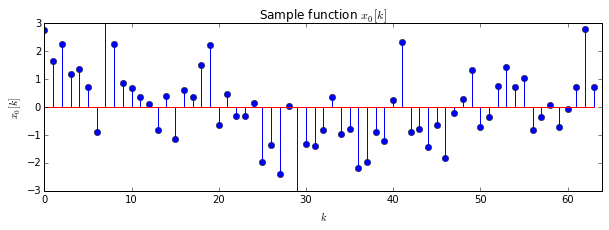

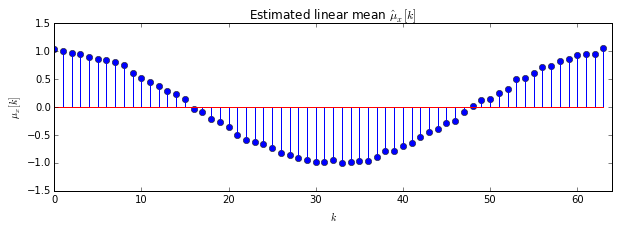

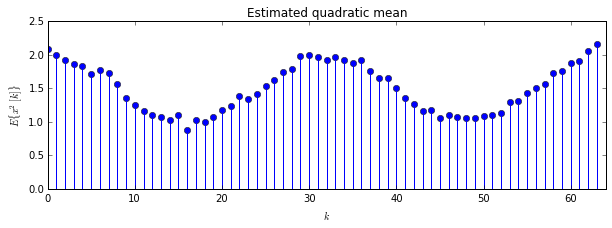

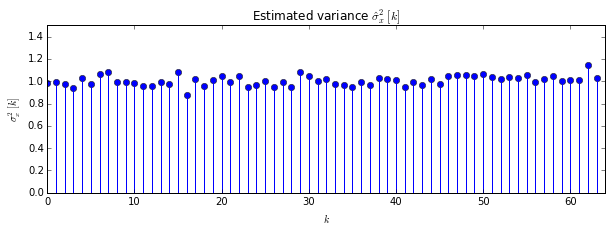

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

K = 64  # number of random samples
N = 1000  # number of sample functions


# generate the sample functions
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

# approximate the linear mean as ensemble average
mu = 1/N * np.sum(x, 0)
# approximate the quadratic mean
qu = 1/N * np.sum(x**2, 0)
# approximate the variance
sigma = 1/N * np.sum((x-mu)**2, 0)


# plot results
plt.rc('figure', figsize=(10, 3))

plt.figure()
plt.stem(x[0, :])
plt.title(r'Sample function $x_0[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$x_0[k]$')
plt.axis([0, K, -3, 3])

plt.figure()
plt.stem(mu)
plt.title(r'Estimated linear mean $\hat{\mu}_x[k]$ ')
plt.xlabel(r'$k$')
plt.ylabel(r'$\mu_x[k]$')
plt.axis([0, K, -1.5, 1.5])

plt.figure()
plt.stem(qu)
plt.title(r'Estimated quadratic mean')
plt.xlabel(r'$k$')
plt.ylabel(r'$E\{x^2[k]\}$')
plt.axis([0, K, 0, 2.5])

plt.figure()
plt.stem(sigma)
plt.title(r'Estimated variance $\hat{\sigma}^2_x[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma_x^2[k]$')
plt.axis([0, K, 0, 1.5]);

**Exercise**

* What does the linear and quadratic mean, and the variance tell you about the general behavior of the sample functions?
* Change the number `N` of sample functions and rerun the cell. What influence has a decrease/increase of the sample functions on the estimated ensemble averages?

### Second Order Ensemble Averages

#### Definition

The second order ensemble average of two continuous-amplitude real-valued random signals $x[k]$ and $y[k]$ is defined as

$$E\{ f(x[k_x], y[k_y]) \} := \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k_x], y_n[k_y])$$

It can be given in terms of the bivariate PDF as

$$E\{ f(x[k_x], y[k_y]) \} = \iint\limits_{-\infty}^{\infty} f(\theta_x, \theta_y) \, p_{xy}(\theta_x, \theta_y, k_x, k_y) \, \mathrm{d}\theta_x\, \mathrm{d}\theta_y$$

#### Cross-correlation function

The [cross-correlation function](https://en.wikipedia.org/wiki/Cross-correlation) (CCF) of two random signals $x[k]$ and $y[k]$ is defined as the second order ensemble average for a linear mapping $f(x[k_x], y[k_y]) = x[k_x] \cdot y[k_y]$

$$\varphi_{xy}[k_x, k_y] = E\{ x[k_x] \cdot y[k_y] \}$$

It characterizes the statistical dependencies of two random signals at two different time instants.

#### Auto-correlation function

The [auto-correlation function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF) of a random signal $x[k]$ is defined as the second order ensemble average for a linear mapping $f(x[k_x], y[k_y]) = x[k_1] \cdot x[k_2]$

$$\varphi_{xx}[k_1, k_2] = E\{ x[k_1] \cdot x[k_2] \}$$

It characterizes the statistical dependencies between the samples of a random signal at two different time instants.

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>